In [34]:
from keras.models import Sequential
import keras
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import helper_functions
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv('train.csv')

In [36]:
y = df.label
X = df.drop('label', axis = 1)

In [37]:
X = X/255
y = to_categorical(y)

In [38]:
X = X.values
X = X.reshape(X.shape[0], 28, 28, 1) 

Peform train/test split!

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [92]:
model = Sequential()

In [93]:
model.add(Conv2D(filters = 96, kernel_size = (2, 2), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2), padding = 'valid'))

In [94]:
model.add(Conv2D(filters = 256, kernel_size = (2, 2), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2), padding = 'valid'))

In [95]:
model.add(Conv2D(filters = 384, kernel_size = (2, 2), input_shape = X.shape[1:]))
model.add(Activation('relu'))

In [96]:
model.add(Dense(128))
model.add(Activation('relu'))

In [97]:
model.add(Dense(128))
model.add(Activation('relu'))

In [98]:
model.add(Flatten())

In [99]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [100]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [101]:
#history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data = (X_test,y_test))

In [102]:
#plt.plot(history.epoch,history.history['accuracy'],label = "accuracy") # Accuracy curve for training set
#plt.plot(history.epoch,history.history['val_accuracy'],label = "val_accuracy") # Accuracy curve for validation set

#plt.title("Accuracy Curve", fontsize = 18)
#plt.xlabel("Epochs", fontsize = 15)
#plt.ylabel("Accuracy", fontsize = 15)
#plt.grid(alpha = 0.3)
#plt.legend()

In [103]:
datagen = ImageDataGenerator(
        featurewise_center = False,  
        samplewise_center = False,  
        featurewise_std_normalization = False,  
        samplewise_std_normalization = False,  
        zca_whitening = False,  
        rotation_range = 10, 
        zoom_range = 0.1, 
        width_shift_range = 0.1, 
        height_shift_range = 0.1,
        horizontal_flip = False, 
        vertical_flip = False)  

datagen.fit(X_train)

In [ ]:
history_2 = model.fit_generator(datagen.flow(X_train,y_train), epochs = 20, validation_data = (X_test,y_test))

Epoch 1/20
919/919 [==============================] - 41s 45ms/step - loss: 0.3533 - accuracy: 0.8847 - val_loss: 0.1077 - val_accuracy: 0.9652
Epoch 2/20
919/919 [==============================] - 43s 47ms/step - loss: 0.1266 - accuracy: 0.9618 - val_loss: 0.0668 - val_accuracy: 0.9787
Epoch 3/20
919/919 [==============================] - 44s 47ms/step - loss: 0.1000 - accuracy: 0.9688 - val_loss: 0.0456 - val_accuracy: 0.9855
Epoch 4/20
919/919 [==============================] - 46s 50ms/step - loss: 0.0851 - accuracy: 0.9730 - val_loss: 0.0458 - val_accuracy: 0.9857
Epoch 5/20
919/919 [==============================] - 46s 50ms/step - loss: 0.0740 - accuracy: 0.9770 - val_loss: 0.0491 - val_accuracy: 0.9840
Epoch 6/20
919/919 [==============================] - 46s 50ms/step - loss: 0.0688 - accuracy: 0.9794 - val_loss: 0.0424 - val_accuracy: 0.9875
Epoch 7/20
919/919 [==============================] - 46s 50ms/step - loss: 0.0641 - accuracy: 0.9794 - val_loss: 0.0351 - val_accuracy:

In [68]:
history_2 = model.fit_generator(datagen.flow(X_train,y_train), epochs = 20, validation_data = (X_test,y_test))

Epoch 1/20
919/919 [==============================] - 41s 45ms/step - loss: 0.3868 - accuracy: 0.8773 - val_loss: 0.1018 - val_accuracy: 0.9676
Epoch 2/20
919/919 [==============================] - 42s 46ms/step - loss: 0.1332 - accuracy: 0.9602 - val_loss: 0.0593 - val_accuracy: 0.9807
Epoch 3/20
919/919 [==============================] - 42s 46ms/step - loss: 0.1079 - accuracy: 0.9665 - val_loss: 0.0549 - val_accuracy: 0.9827
Epoch 4/20
919/919 [==============================] - 44s 48ms/step - loss: 0.0906 - accuracy: 0.9726 - val_loss: 0.0487 - val_accuracy: 0.9848
Epoch 5/20
919/919 [==============================] - 45s 49ms/step - loss: 0.0758 - accuracy: 0.9766 - val_loss: 0.0365 - val_accuracy: 0.9879
Epoch 6/20
919/919 [==============================] - 50s 54ms/step - loss: 0.0712 - accuracy: 0.9788 - val_loss: 0.0348 - val_accuracy: 0.9886
Epoch 7/20
919/919 [==============================] - 52s 56ms/step - loss: 0.0648 - accuracy: 0.9806 - val_loss: 0.0359 - val_accuracy:

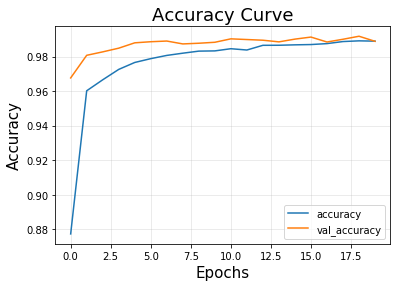

In [69]:
plt.plot(history_2.epoch,history_2.history['accuracy'],label = "accuracy") # Accuracy curve for training set
plt.plot(history_2.epoch,history_2.history['val_accuracy'],label = "val_accuracy") # Accuracy curve for validation set

plt.title("Accuracy Curve",fontsize = 18)
plt.xlabel("Epochs",fontsize = 15)
plt.ylabel("Accuracy",fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend()

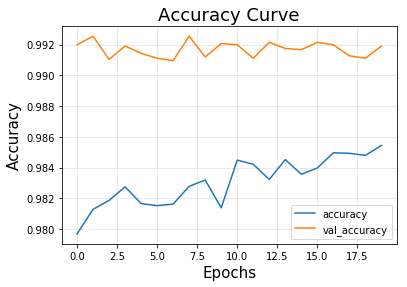

In [57]:
plt.plot(history_2.epoch,history_2.history['accuracy'],label = "accuracy") # Accuracy curve for training set
plt.plot(history_2.epoch,history_2.history['val_accuracy'],label = "val_accuracy") # Accuracy curve for validation set

plt.title("Accuracy Curve",fontsize = 18)
plt.xlabel("Epochs",fontsize = 15)
plt.ylabel("Accuracy",fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend()

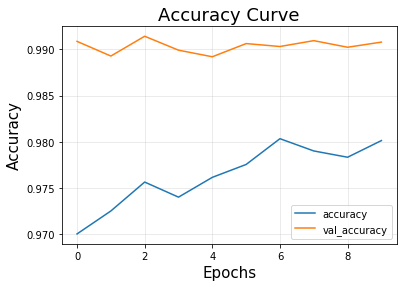

In [55]:
plt.plot(history_2.epoch,history_2.history['accuracy'],label = "accuracy") # Accuracy curve for training set
plt.plot(history_2.epoch,history_2.history['val_accuracy'],label = "val_accuracy") # Accuracy curve for validation set

plt.title("Accuracy Curve",fontsize = 18)
plt.xlabel("Epochs",fontsize = 15)
plt.ylabel("Accuracy",fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend()

In [70]:
X_test = pd.read_csv('test.csv')

In [71]:
X_test = X_test.values
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) 

In [72]:
X_test = X_test/255

In [73]:
y_pred = model.predict_classes(X_test)

In [74]:
result = helper_functions.package_submission(predictions = y_pred)

In [76]:
result.to_excel('predictions.xlsx', index = False)